In [1]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px

In [2]:
airfoil = "0018"
data = pd.read_csv("NACA " + airfoil + "/" + airfoil + ".csv").set_index("Alpha")
data

,C_l,C_d,C_m
Alpha,,,
-14.000000,-1.188619,0.037295,-0.051713
-13.428571,-1.179946,0.032501,-0.050443
-12.857143,-1.166441,0.028502,-0.048290
-12.285714,-1.147888,0.025295,-0.045258
-11.714286,-1.127144,0.022679,-0.041240
-11.142857,-1.104778,0.020660,-0.036136
-10.571429,-1.089047,0.019068,-0.028871
-10.000000,-1.085562,0.017962,-0.018436
-9.428571,-1.101938,0.017350,-0.003648


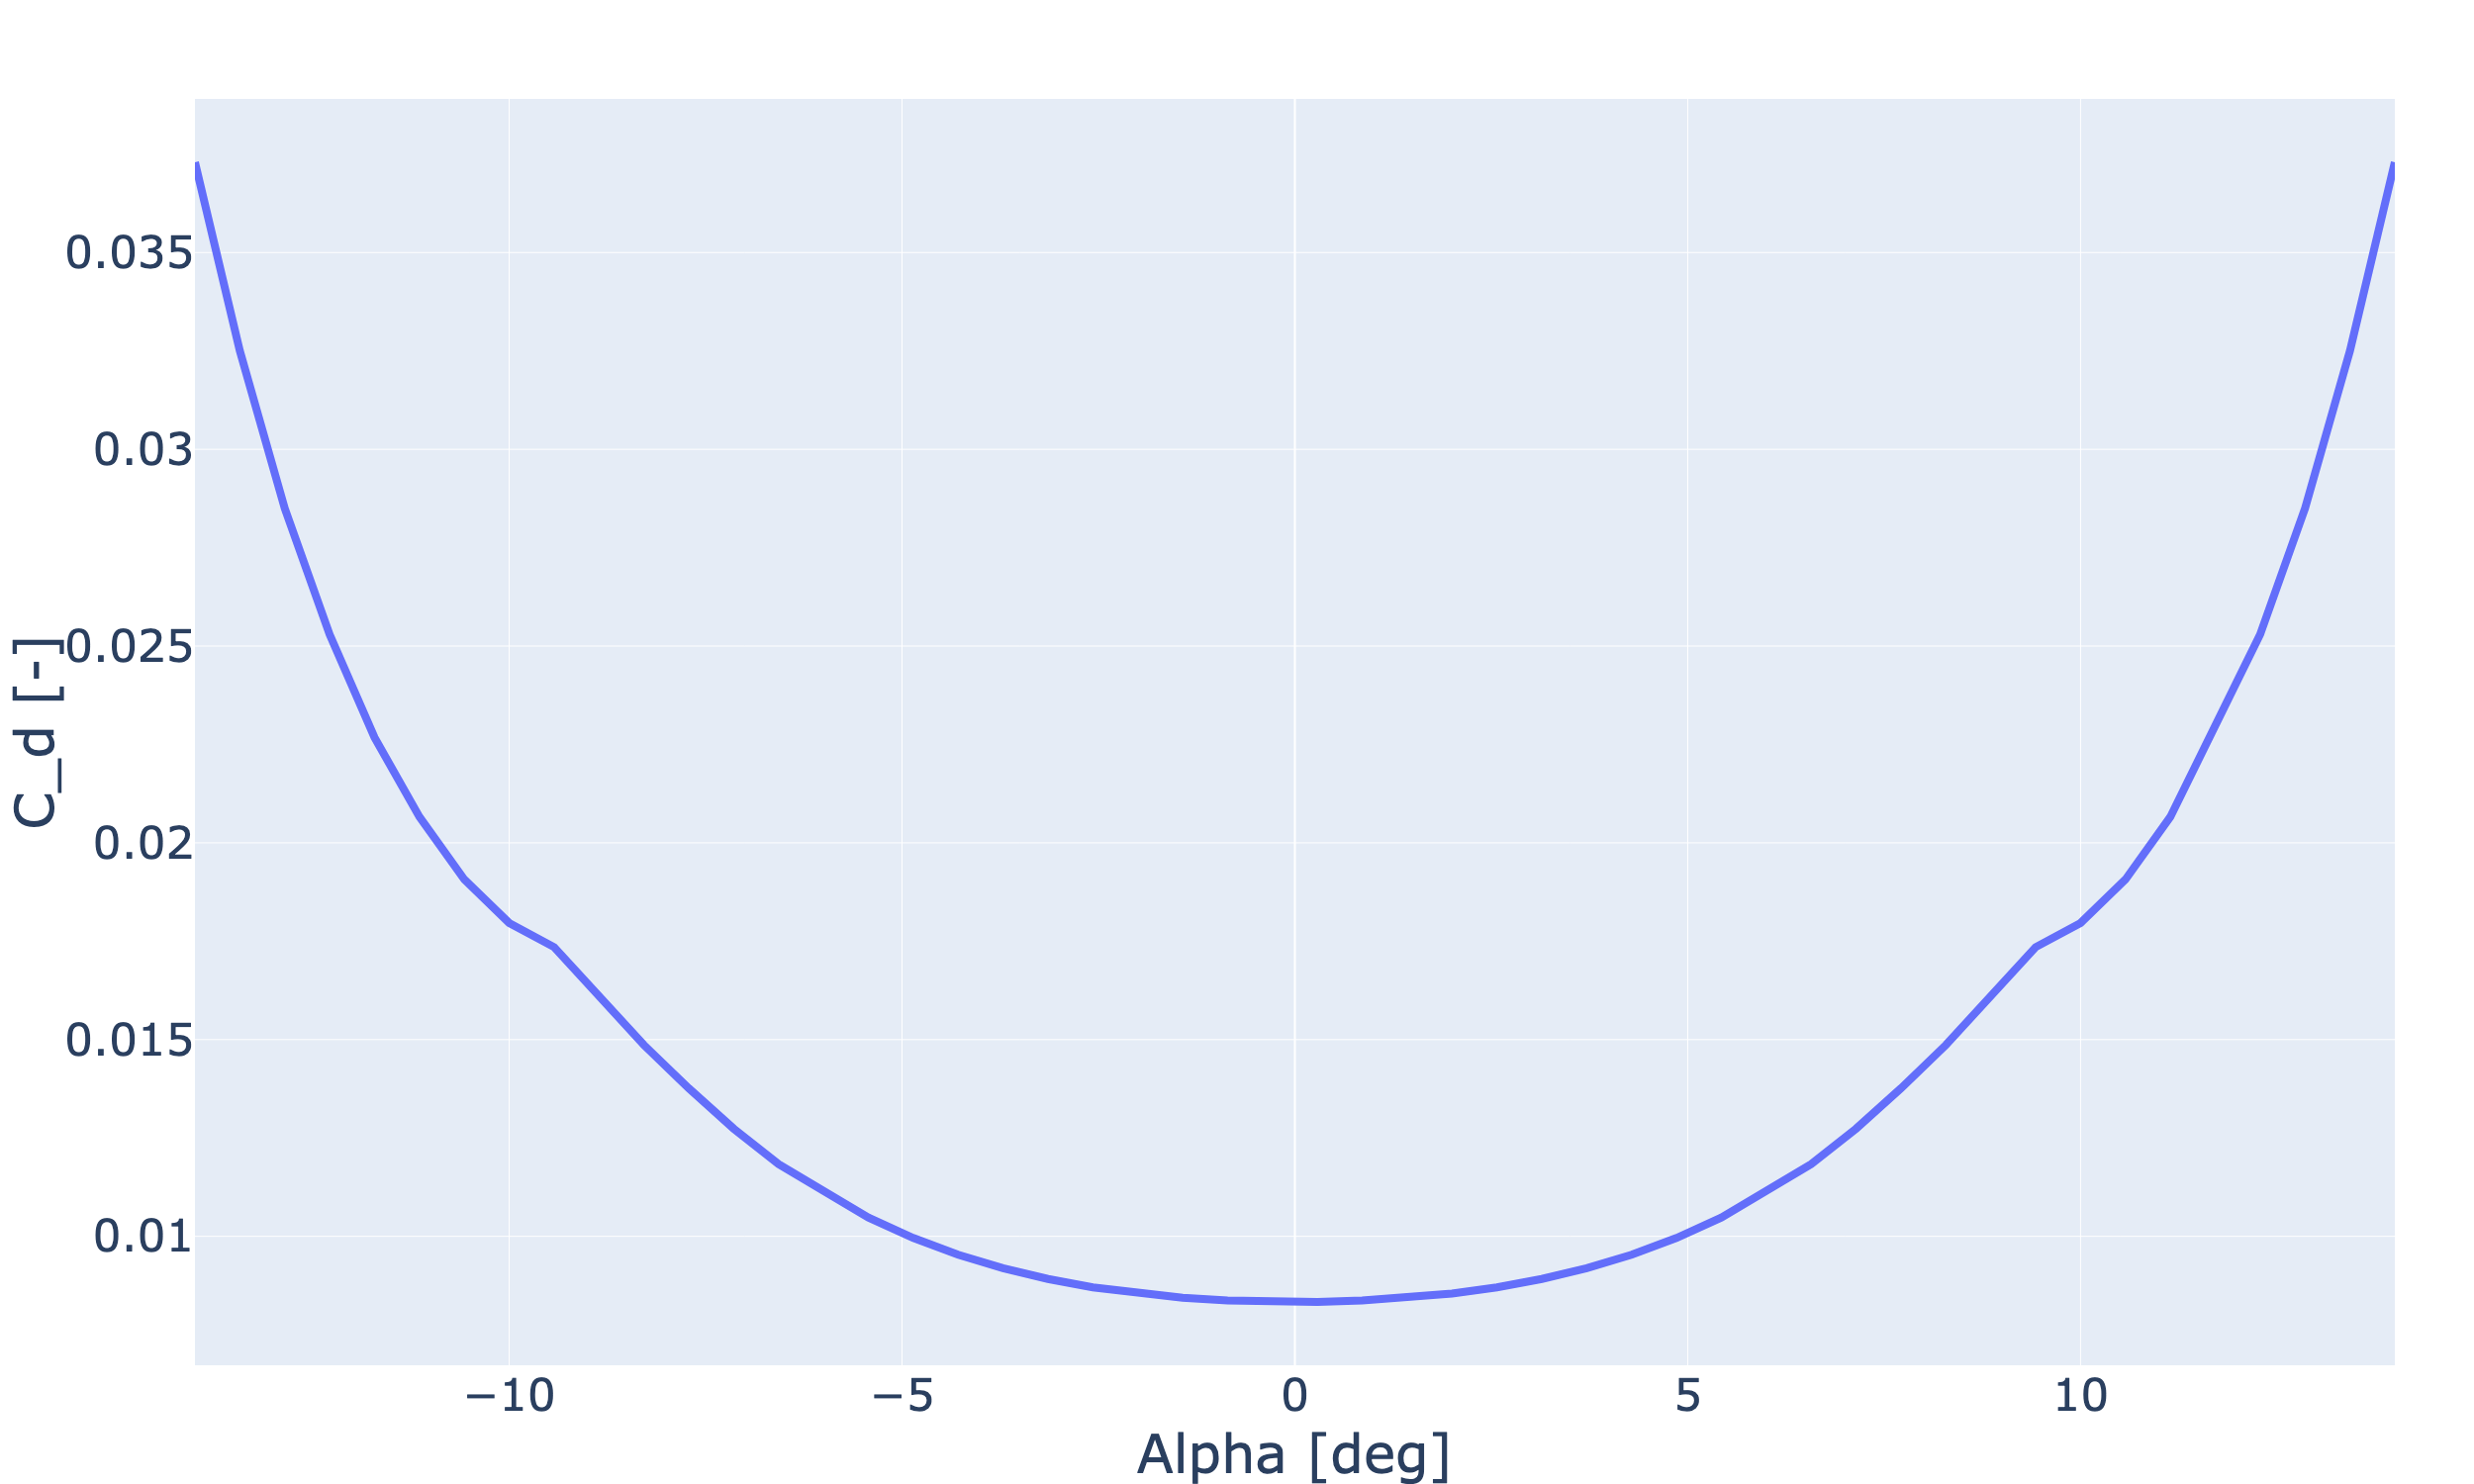

C_d'': 0.00025886363255763644
C_d(0): 0.008332496587032001


array([1.29431816e-04, 1.07341673e-05, 6.97246236e-03])

In [3]:
cd_alpha = go.Figure()

cd_alpha.add_trace(
    go.Scatter(
        x=data.index,
        y=data["C_d"],
        mode="lines",
        name="Re = 587136",
        line=dict(
            width=8
        ),
    )
)
cd_alpha.update_layout(
    xaxis_title='Alpha [deg]',
    yaxis_title="C_d [-]",
    font=dict(
        # family='Open Sans',
        size=24
    )
)
cd_alpha.write_html("NACA " + airfoil + "/" + airfoil + '_cd_alpha.html')
cd_alpha.update_layout(
    xaxis_title='Alpha [deg]',
    yaxis_title="C_d [-]",
    font=dict(
        size=45
    )
)
cd_alpha.show('png', width=2500, height=1500)

cd_alpha_int = interp1d(data.index, data["C_d"])
cd_fit = np.polyfit(data.index, data["C_d"], 2)
print("C_d'':", 2*cd_fit[0])
print("C_d(0):", cd_alpha_int(0))
cd_fit

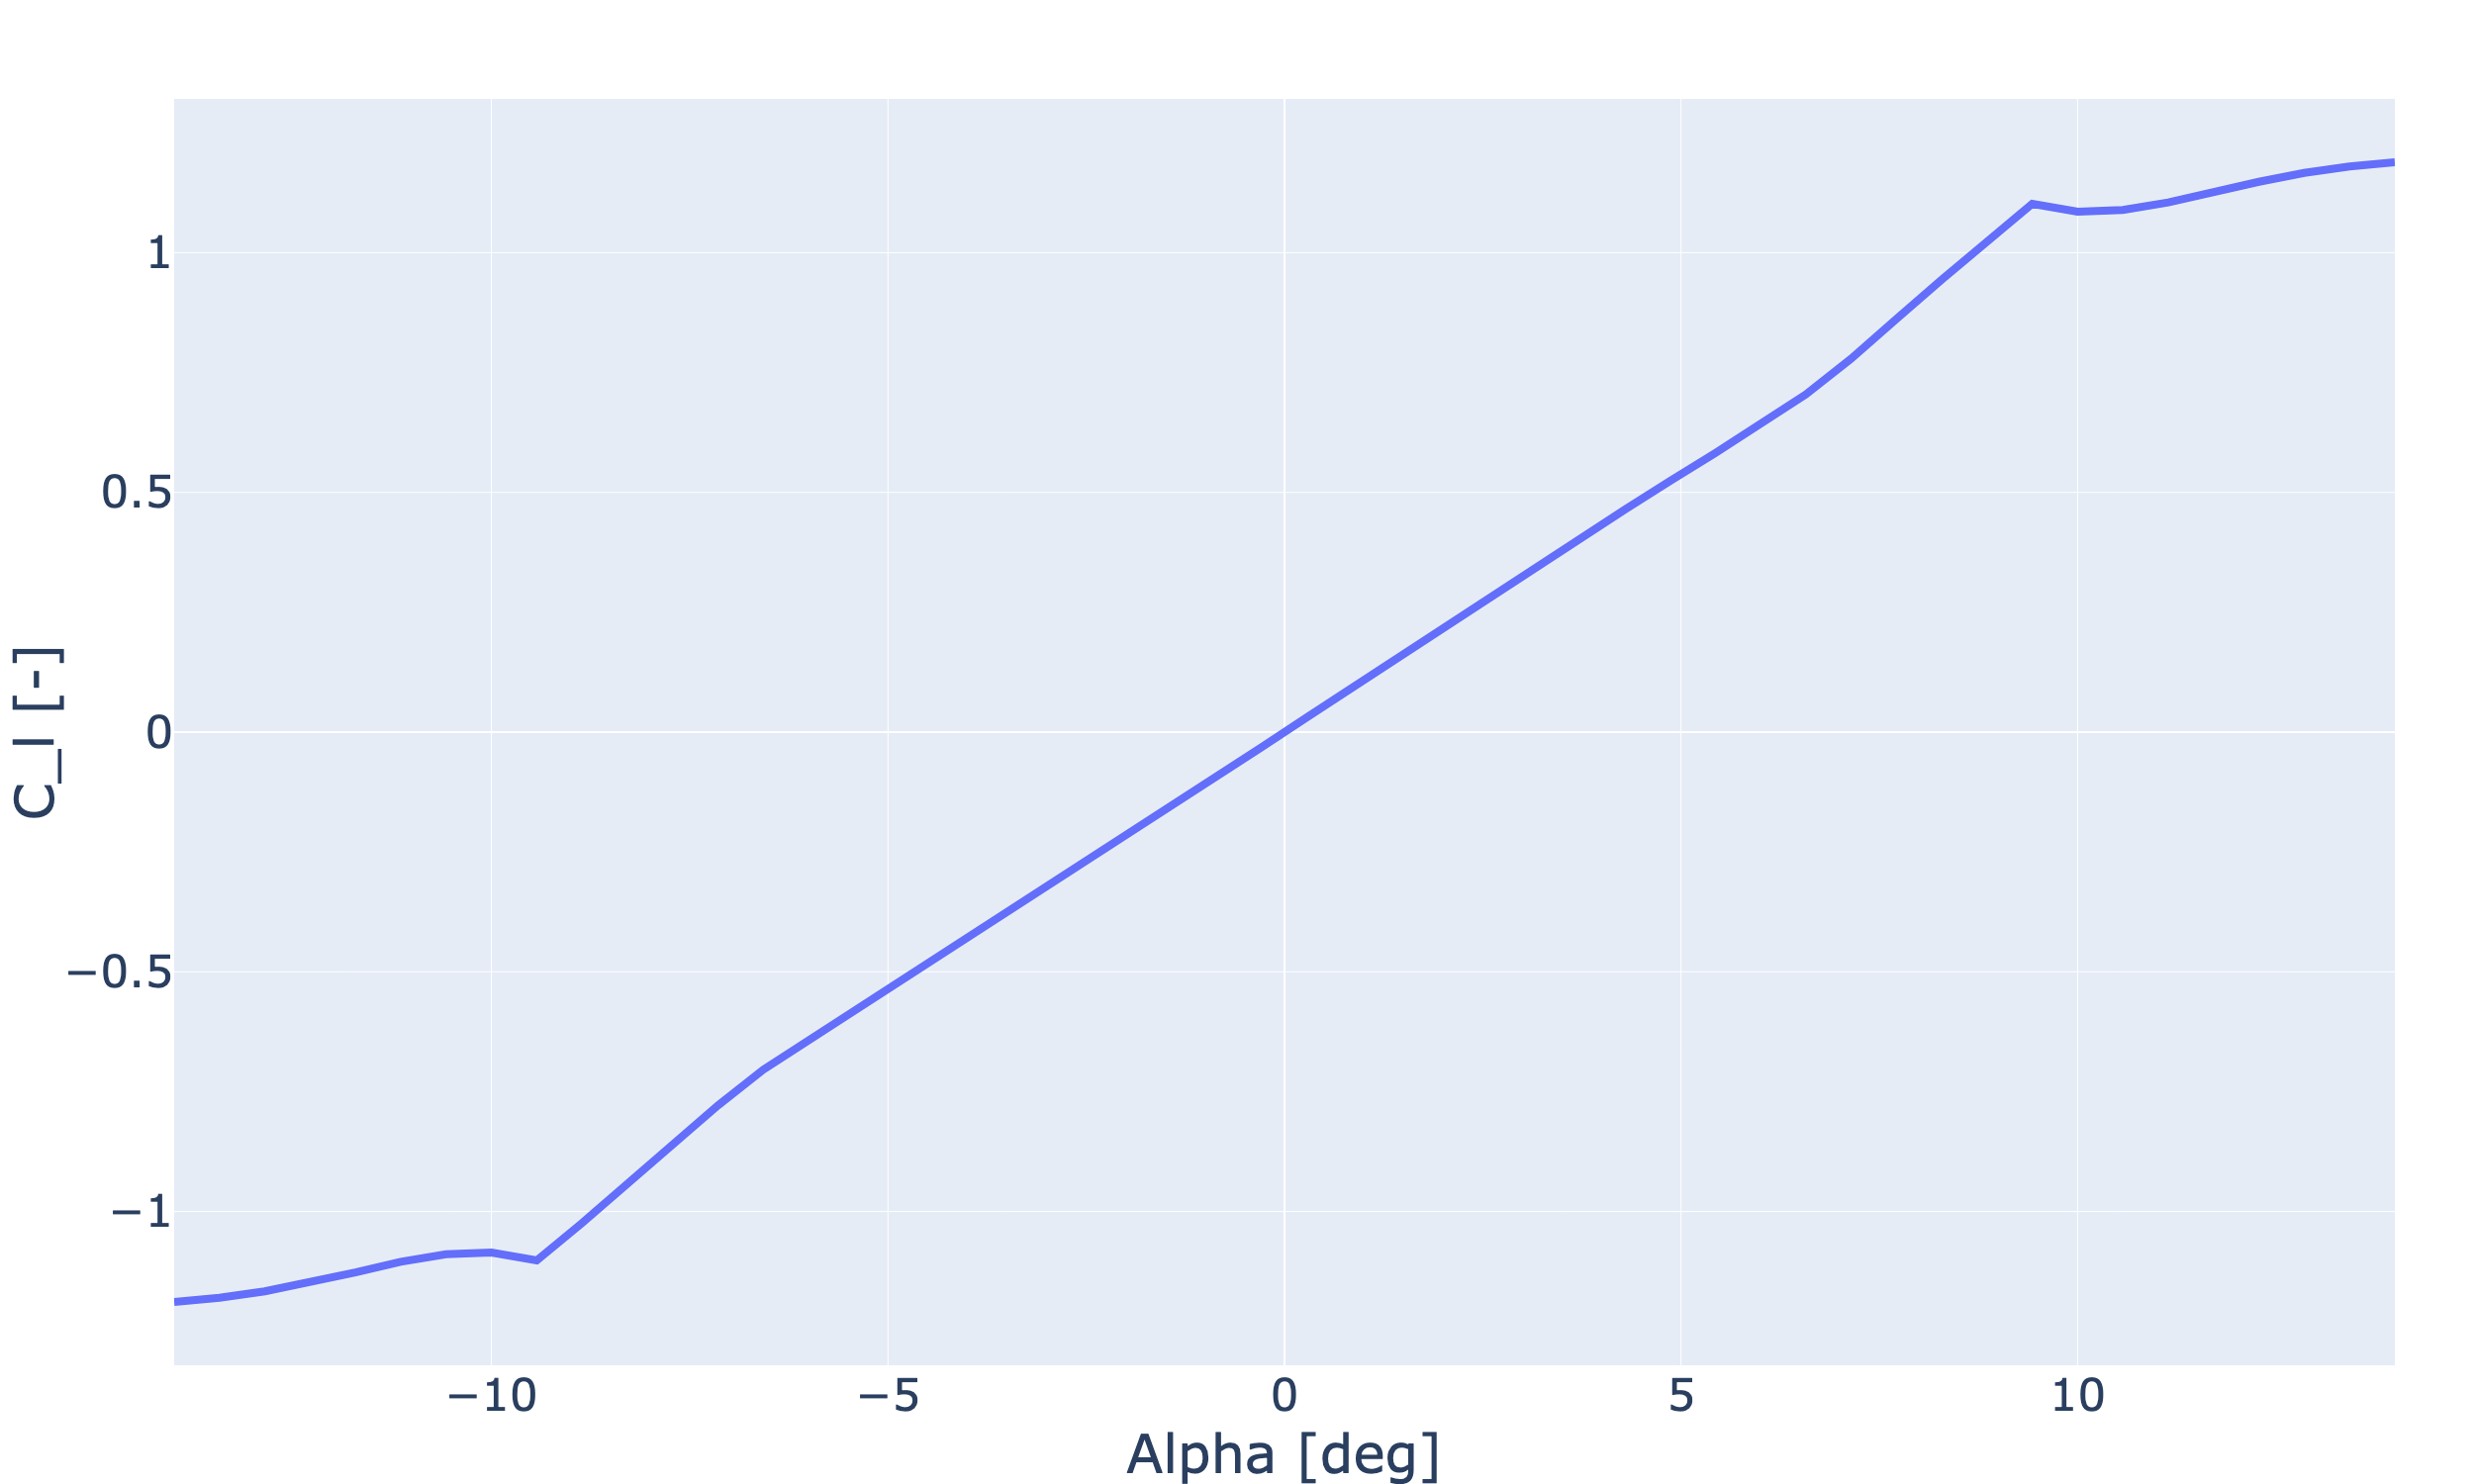

C_l': 0.10914445324731836
C_l(0): 3.793850650302133e-12


In [4]:
cl_alpha = go.Figure()

cl_alpha.add_trace(
    go.Scatter(
        x=data.index,
        y=data["C_l"],
        mode="lines",
        name="Re = 587136",
        line=dict(
            width=8
        ),
    )
)
cl_alpha.update_layout(
    xaxis_title='Alpha [deg]',
    yaxis_title="C_l [-]",
    font=dict(
        # family='Open Sans',
        size=24
    )
)
cl_alpha.write_html("NACA " + airfoil + "/" + airfoil + '_cl_alpha.html')
cl_alpha.update_layout(
    xaxis_title='Alpha [deg]',
    yaxis_title="C_l [-]",
    font=dict(
        size=45
    )
)
cl_alpha.show('png', width=2500, height=1500)

cl_alpha_int = interp1d(data.index, data["C_l"])
cl_fit = np.polyfit(data.iloc[10:-10].index, data.iloc[10:-10]["C_l"], 1)
print("C_l':", cl_fit[0])
print("C_l(0):", cl_alpha_int(0))


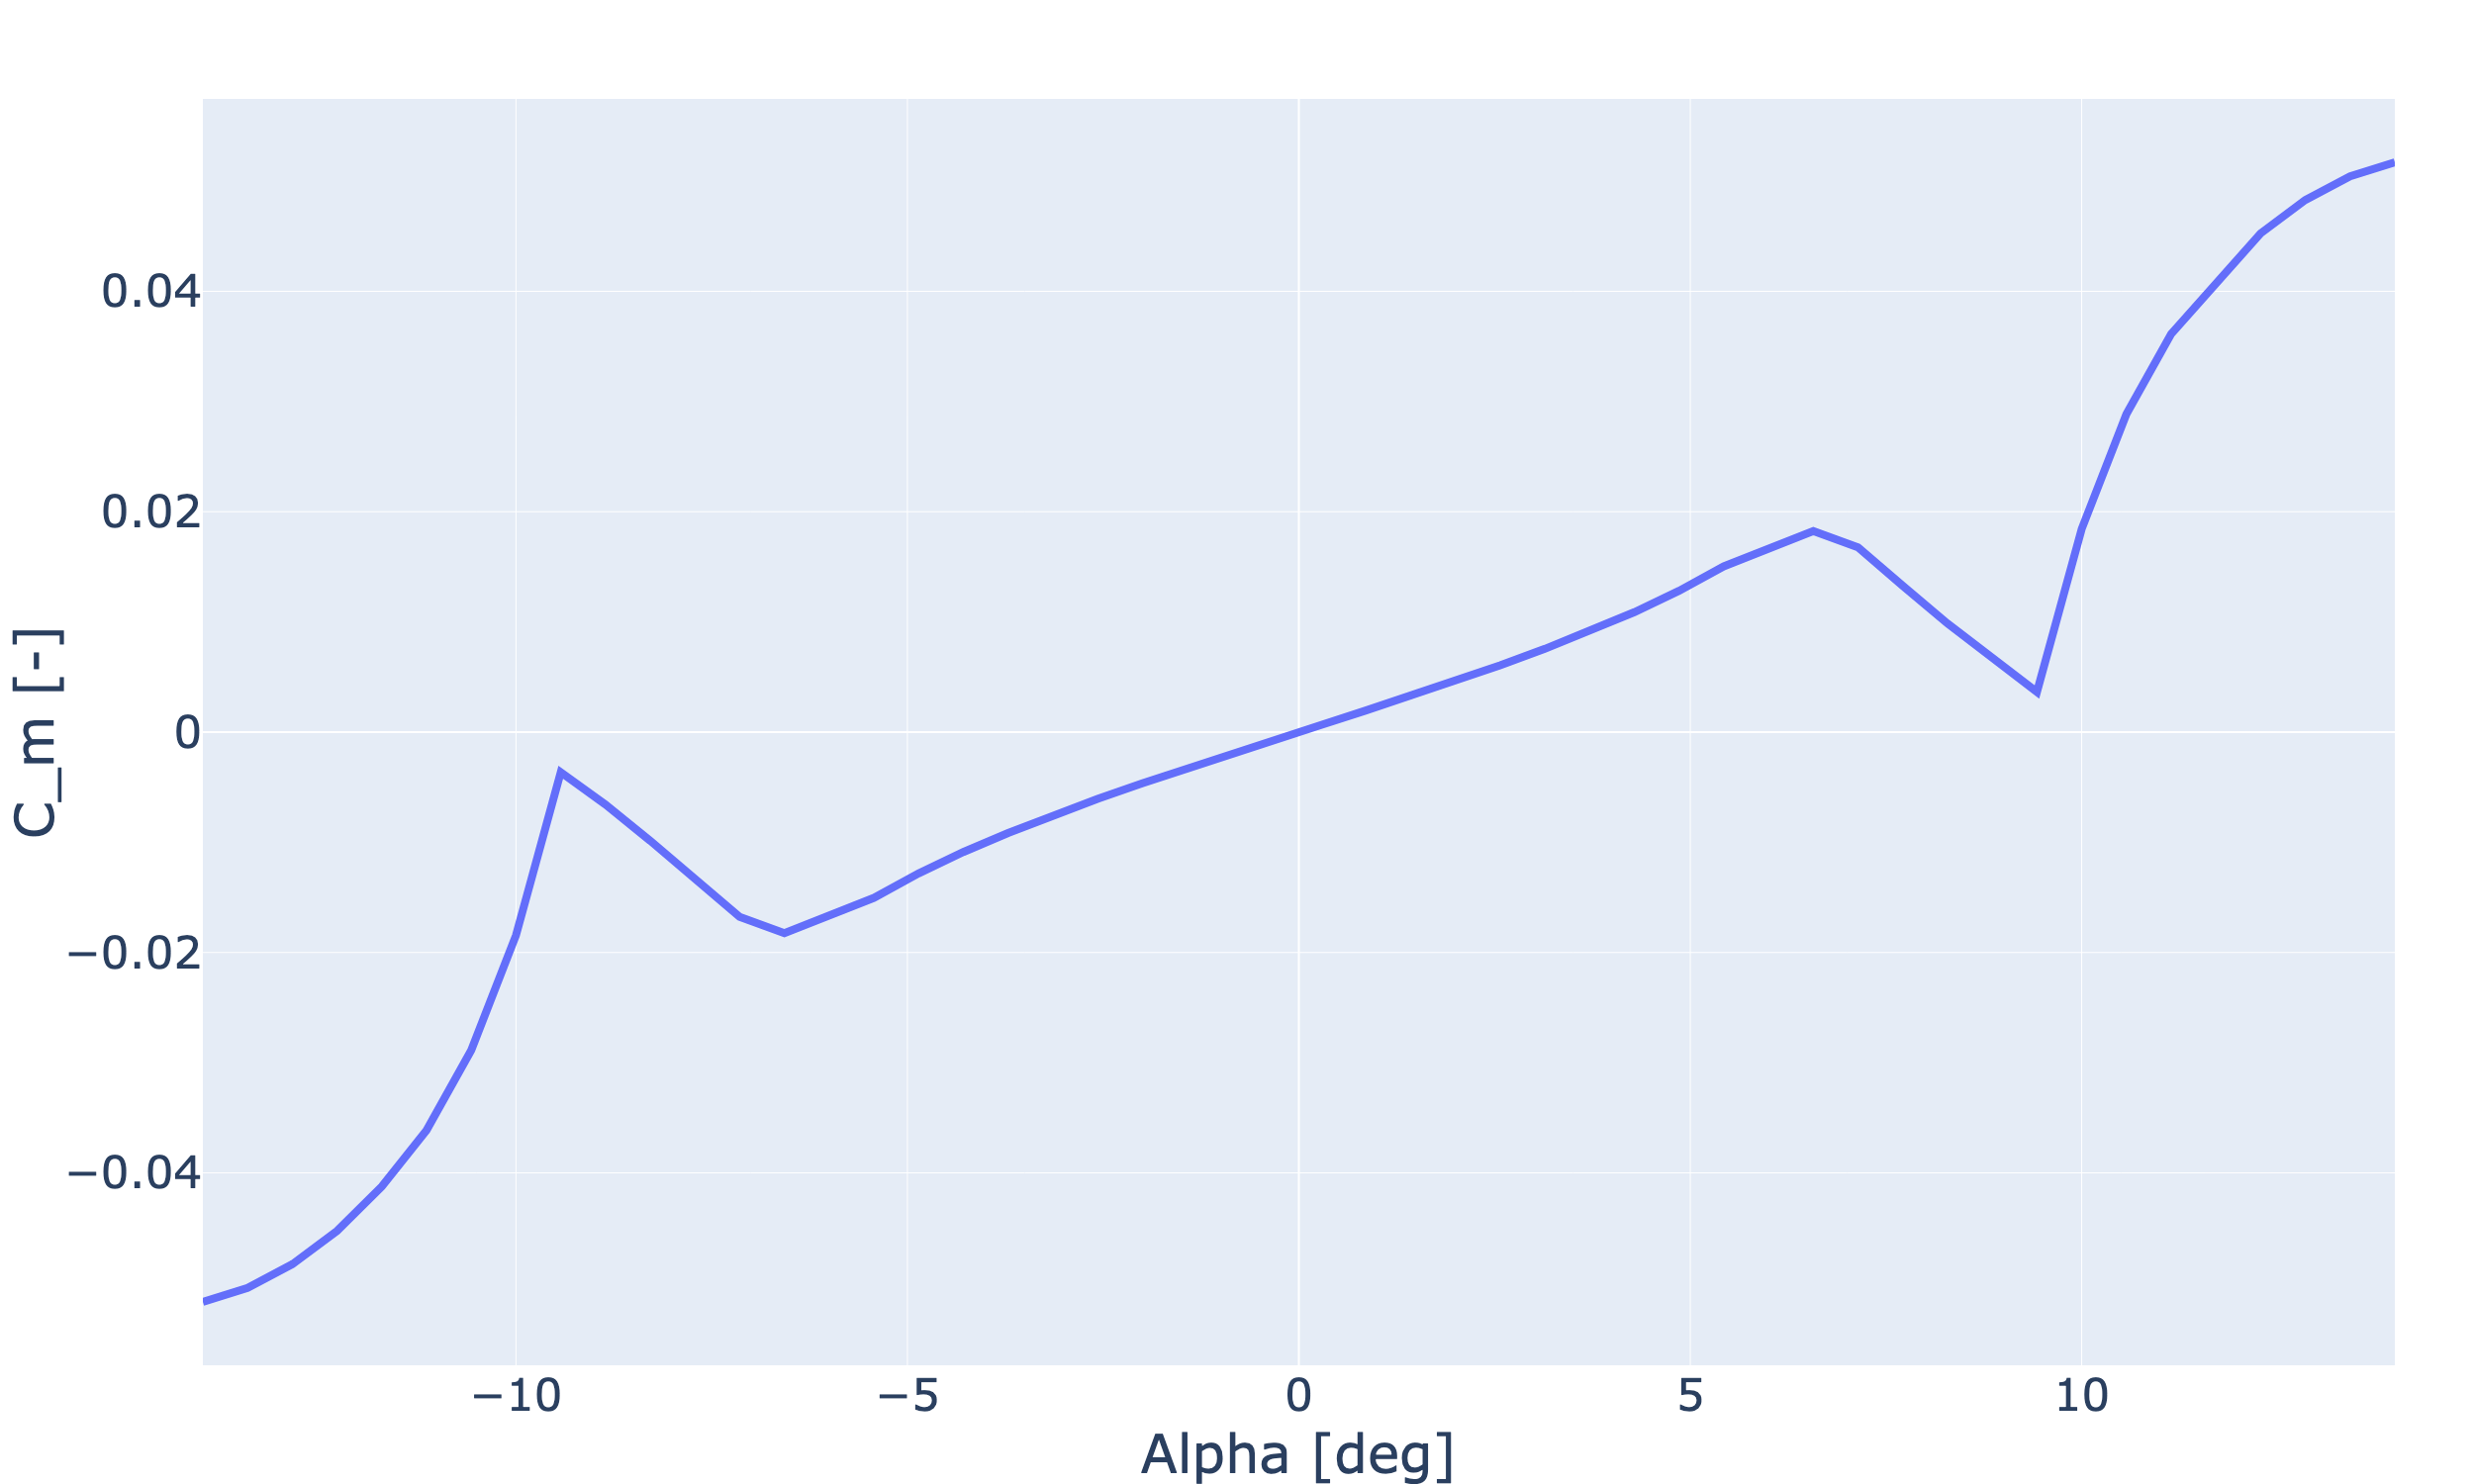

In [5]:
cm_alpha = go.Figure()

cm_alpha.add_trace(
    go.Scatter(
        x=data.index,
        y=data["C_m"],
        mode="lines",
        name="Re = 587136",
        line=dict(
            width=8
        ),
    )
)
cm_alpha.update_layout(
    xaxis_title='Alpha [deg]',
    yaxis_title="C_m [-]",
    font=dict(
        # family='Open Sans',
        size=24
    )
)
cm_alpha.update_layout(
    xaxis_title='Alpha [deg]',
    yaxis_title="C_m [-]",
    font=dict(
        size=45
    )
)
cm_alpha.show('png', width=2500, height=1500)
cm_alpha.write_html("NACA " + airfoil + "/" + airfoil + '_cm_alpha.html')

cm_alpha_int = interp1d(data.index, data["C_m"])
cm_fit = np.polyfit(data.index, data["C_m"], 1)